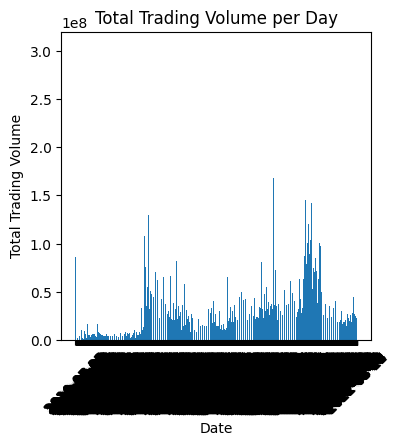

In [74]:
#Exploratory Data Analysis & visualization
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("TSLA.csv")

Volume_per_day = data.groupby('Date')['Volume'].sum().reset_index()

plt.figure(figsize=(4, 4))
plt.bar(Volume_per_day['Date'], Volume_per_day['Volume'])
plt.xlabel('Date')
plt.ylabel('Total Trading Volume')
plt.title('Total Trading Volume per Day')
plt.xticks(rotation=45)
plt.show()

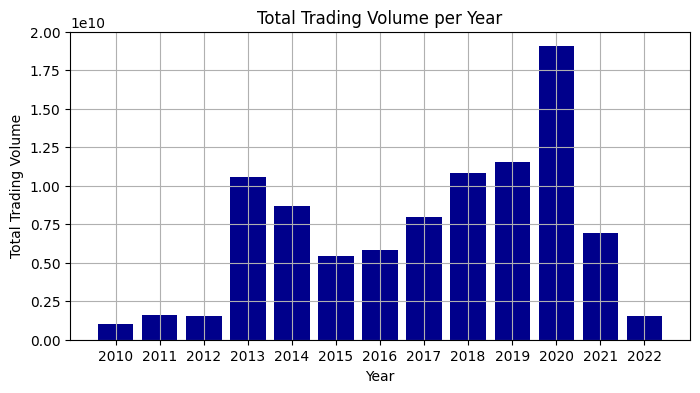

In [75]:
#Exploratory Data Analysis & visualization
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("TSLA.csv")

data['Date'] = pd.to_datetime(data['Date'])


data['Year'] = data['Date'].dt.year

Volume_per_year = data.groupby('Year')['Volume'].sum().reset_index()


plt.figure(figsize=(8, 4))
plt.bar(Volume_per_year['Year'], Volume_per_year['Volume'], color='darkblue')
plt.xlabel('Year')
plt.ylabel('Total Trading Volume')
plt.title('Total Trading Volume per Year')
plt.xticks(Volume_per_year['Year'])
plt.grid(True)
plt.show()

In [76]:
#Linear Regression
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# a) Read the data with pandas and describe the data
data = pd.read_csv("TSLA.csv")
print(data.describe())

              Open         High          Low        Close    Adj Close  \
count  2956.000000  2956.000000  2956.000000  2956.000000  2956.000000   
mean    138.691296   141.771603   135.425953   138.762183   138.762183   
std     250.044839   255.863239   243.774157   250.123115   250.123115   
min       3.228000     3.326000     2.996000     3.160000     3.160000   
25%      19.627000    20.402000    19.127500    19.615000    19.615000   
50%      46.656999    47.487001    45.820002    46.545000    46.545000   
75%      68.057001    69.357500    66.911501    68.103998    68.103998   
max    1234.410034  1243.489990  1217.000000  1229.910034  1229.910034   

             Volume  
count  2.956000e+03  
mean   3.131449e+07  
std    2.798383e+07  
min    5.925000e+05  
25%    1.310288e+07  
50%    2.488680e+07  
75%    3.973875e+07  
max    3.046940e+08  


In [77]:
# b) Find data type and shape of each column
print(data.dtypes)
print(data.shape)

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object
(2956, 7)


In [78]:
# c) Find the null values and fill them with '0' or mean of that column
print(data.isnull().sum())
data.fillna(0, inplace=True)  # Filling null values with 0

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [79]:
# d) Find features and target variables
import pandas as pd
# Features
X = data[['Open', 'High', 'Low', 'Adj Close', 'Volume']]
# Target variable
y = data['Close']

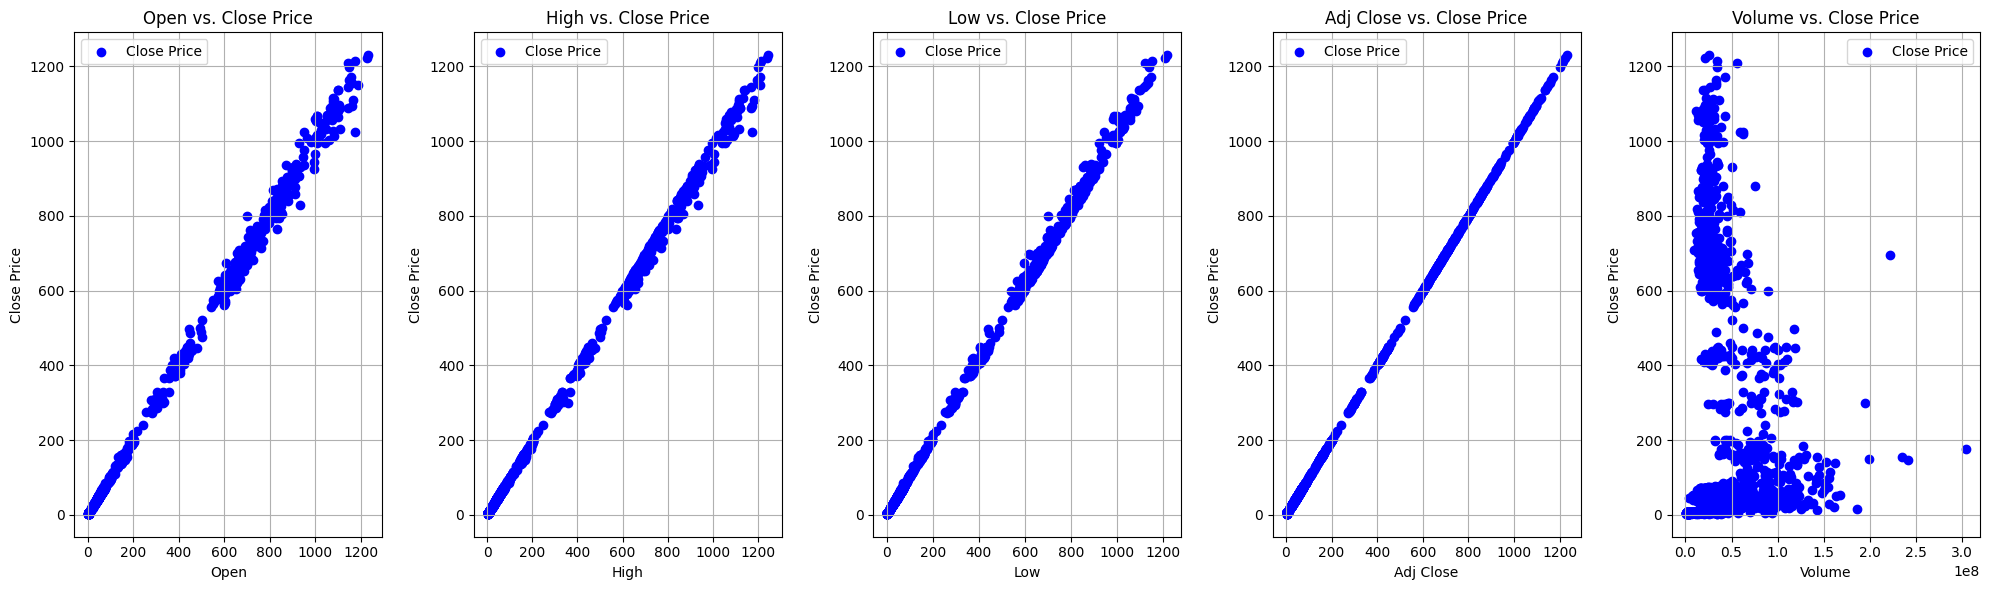

In [80]:
import pandas as pd
import matplotlib.pyplot as plt


data = pd.read_csv('TSLA.csv')

# Assuming 'Close' is the target variable
X = data.drop(["Date", "Close"], axis=1)  # Removed "Symbol" and "Series"
y = data["Close"]

# Create subplots for each feature
fig, axs = plt.subplots(1, 5, figsize=(20, 6))
features = ["Open", "High", "Low", "Adj Close", "Volume"]

for i, feature in enumerate(features):
    axs[i].scatter(X[feature], y, color='b', label='Close Price')
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel('Close Price')
    axs[i].set_title(f'{feature} vs. Close Price')
    axs[i].grid(True)
    axs[i].legend()

plt.tight_layout()
plt.show()


In [81]:
# e) Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [82]:
# f) Normalize the data with min-max scaling
numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = []

numeric_transformer = MinMaxScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ])

X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.transform(X_test)

In [83]:
# g) Apply linear regression and find MSE, MAE, RMSE
model = LinearRegression()
model.fit(X_train_scaled, y_train)

print("Linear Model trained successfully.")

predictions = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mse)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)

Linear Model trained successfully.
Mean Squared Error: 8.585048639468517e-28
Mean Absolute Error: 1.4658694678513637e-14
Root Mean Squared Error: 2.9300253649872244e-14


In [84]:
# h) Find w values (coefficients)
w_values = model.coef_
print("Coefficients (w values):", w_values)

Coefficients (w values): [-7.93390528e-13  1.25055521e-12  1.70530257e-13  1.22675003e+03
 -7.63833441e-14]


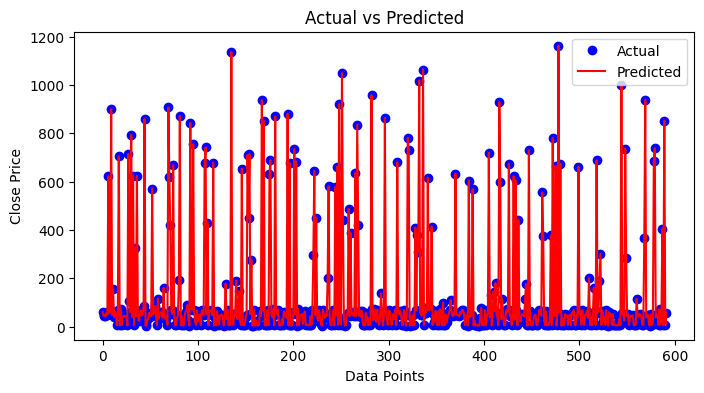

In [85]:
#graph between actual vs predicted values of Linear Regression
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.plot(y_test.values, label='Actual', color='blue', marker='o', linestyle='')
plt.plot(predictions, label='Predicted', color='red')

plt.title('Actual vs Predicted')
plt.xlabel('Data Points')
plt.ylabel('Close Price')
plt.legend()
plt.show()




In [86]:
#knn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Read the data with pandas
data = pd.read_csv("TSLA.csv")





In [87]:
# Drop any rows with missing values
data.dropna(inplace=True)

In [88]:
# Features are all columns except the Date and Close
features = data.drop(columns=['Date', 'Close'])

In [89]:
# Normalize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Target variable
target = data['Close']

In [90]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

# Find MSE for different K values [2-20] and plot a graph (X-axis=K, Y-axis=MSE)
k_values = range(2, 21)
mse_values = []

for k in k_values:
    knn_regressor = KNeighborsRegressor(n_neighbors=k)
    knn_regressor.fit(X_train, y_train)
    y_pred = knn_regressor.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)

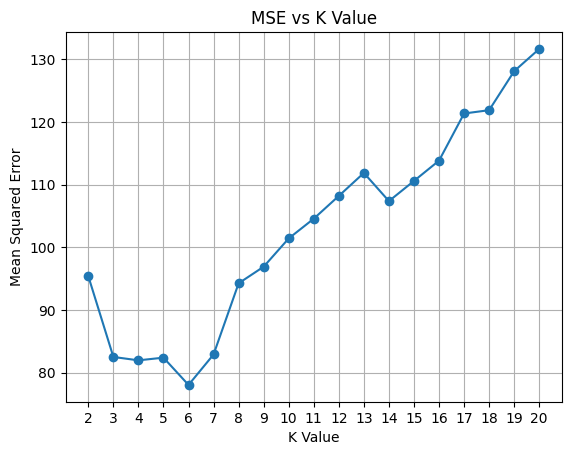

Length of k_values: 19
Length of MSE: 19
MSE: [95.39043629449104, 82.50927273975752, 81.96866020274155, 82.39650958945063, 78.04651931253976, 82.90586234221348, 94.2611461443786, 96.91020321966177, 101.42191504043357, 104.57209512407958, 108.20573935173556, 111.87138855274345, 107.37746795324426, 110.59603963332631, 113.83249856126899, 121.3545938109875, 121.88385302330519, 128.10975563177834, 131.65820535316934]
Mean Squared Error 131.65820535316934


In [91]:
# Plotting the graph MSE vs K
plt.plot(k_values, mse_values, marker='o')
plt.title('MSE vs K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Squared Error')
plt.xticks(k_values)
plt.grid(True)
plt.show()
print("Length of k_values:", len(k_values))
print("Length of MSE:", len(mse_values))
print("MSE:", mse_values)
print("Mean Squared Error",max(mse_values))

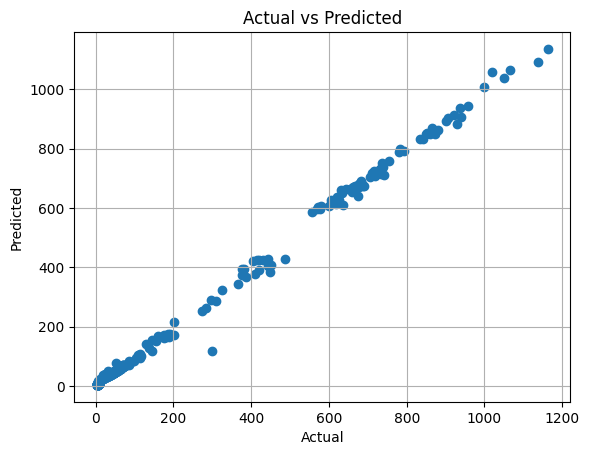

In [92]:
# Plotting actual vs predicted values of knn
plt.scatter(y_test, y_pred)
plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid(True)
plt.show()


In [93]:
#Decision Tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd

# Read the data with pandas
data = pd.read_csv("TSLA.csv")




In [94]:
# Drop any rows with missing values
data.dropna(inplace=True)

# Features are all columns except the Date and Close
features = data.drop(columns=['Date', 'Close'])

# Target variable
target = data['Close']


In [95]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train the decision tree regressor
decision_tree = DecisionTreeRegressor(random_state=42)
decision_tree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [96]:
# Predict on the test set
y_pred = decision_tree.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

In [97]:
print("Decision Tree:")
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)


Decision Tree:
Mean Squared Error (MSE): 2.440802406889585
Mean Absolute Error (MAE): 0.4452122162162161
Root Mean Squared Error (RMSE): 1.562306758255108


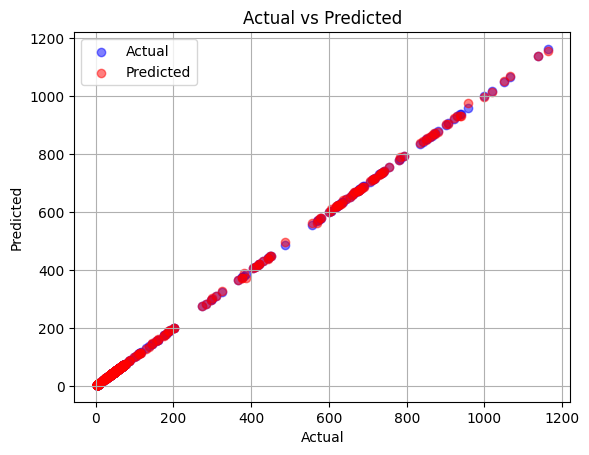

In [98]:
# Plot actual vs predicted values of Decision Tree with different colors for each set
import matplotlib.pyplot as plt
plt.scatter(y_test, y_test, color='blue', label='Actual', alpha=0.5, marker='o')  # Plotting actual values
plt.scatter(y_test, y_pred, color='red', label='Predicted', alpha=0.5, marker='o')  # Plotting predicted values
plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.grid(True)
plt.show()



In [99]:
#Support Vector Machine
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Read the dataset
data = pd.read_csv('TSLA.csv')





In [100]:
# Splitting features and target variable
X = data.drop(['Date', 'Close'], axis=1)  # Dropping 'Date' column and the target variable 'Close'
y = data['Close']


In [101]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [102]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Training the SVM model
svm = SVR(kernel='linear')
svm.fit(X_train_scaled, y_train)


SVR(kernel='linear')

In [103]:
# Predictions
y_pred = svm.predict(X_test_scaled)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("SVM:")
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

SVM:
Mean Squared Error (MSE): 14.798159688829678
Mean Absolute Error (MAE): 1.4237465976419355
Root Mean Squared Error (RMSE): 3.846837621843386


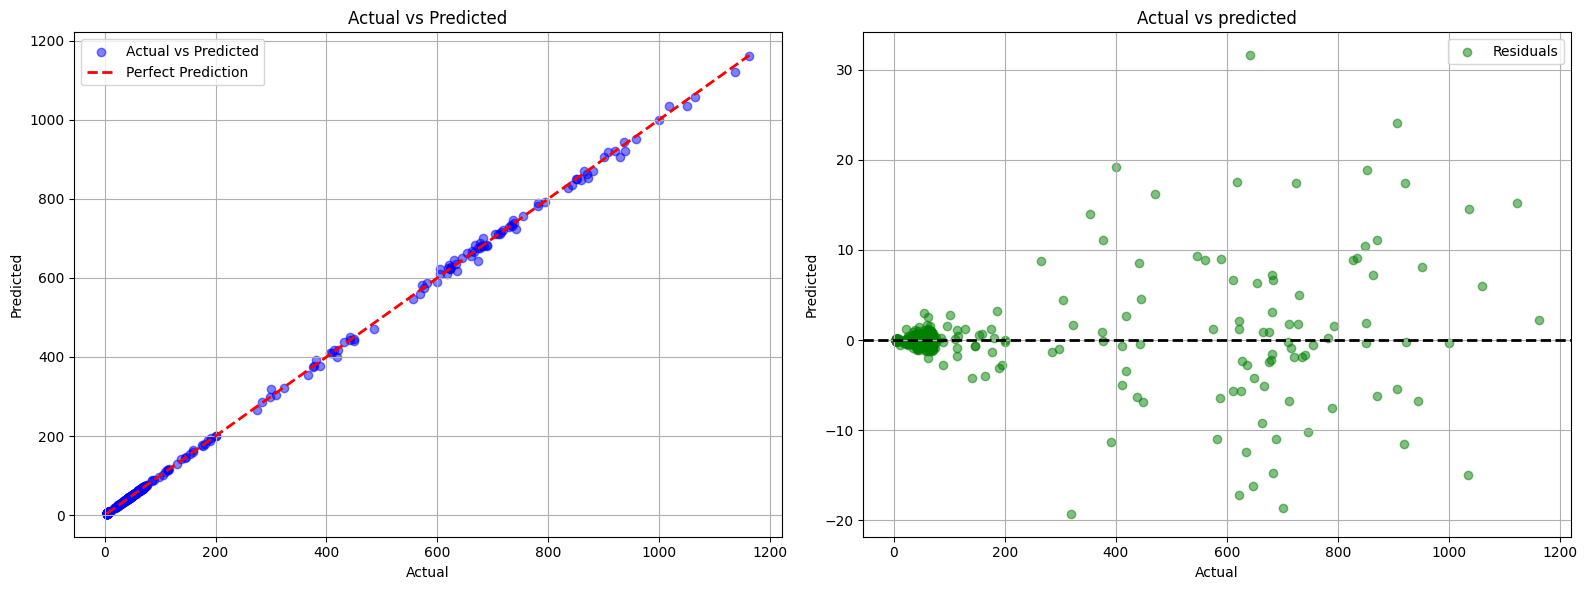

In [104]:

# Plotting actual vs predicted values of SVM with different colors
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 6))


plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, color='blue', label='Actual vs Predicted', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', lw=2, label='Perfect Prediction')  # Diagonal line
plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.grid(True)


plt.subplot(1, 2, 2)
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, color='green', label='Residuals', alpha=0.5)
plt.axhline(y=0, color='black', linestyle='--', lw=2)  # Horizontal line at y=0
plt.title('Actual vs predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [105]:
#Random Forest Regressor
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
from sklearn.impute import SimpleImputer

# Read the dataset
data = pd.read_csv("TSLA.csv")




In [106]:
# Drop unnecessary columns
data = data.drop(['Date'], axis=1)

# Checking for missing values
print("Missing Values:")
print(data.isna().sum())

# Impute missing values
imputer = SimpleImputer(strategy='mean')
data_imputed = imputer.fit_transform(data)
data_imputed = pd.DataFrame(data_imputed, columns=data.columns)

Missing Values:
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [107]:
# Splitting features and target variable
X = data_imputed.drop("Close", axis=1)  # Features
y = data_imputed["Close"]  # Target variable

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [108]:
# Training the Random Forest model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Predictions
y_pred = rf_regressor.predict(X_test)


In [109]:
# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Random Forest:")
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

Random Forest:
Mean Squared Error (MSE): 2.1838412547555475
Mean Absolute Error (MAE): 0.4016431754054025
Root Mean Squared Error (RMSE): 1.477782546505252


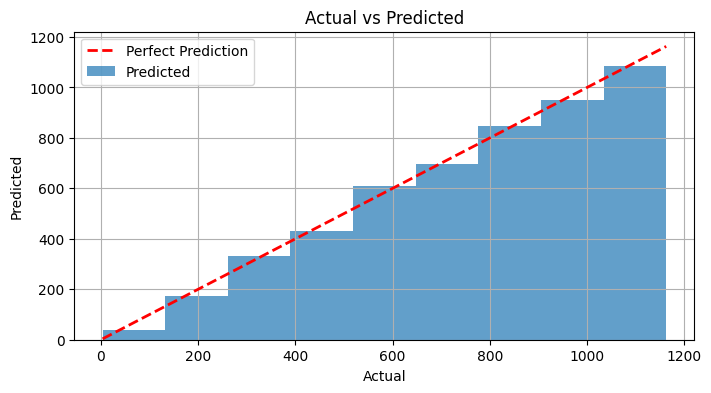

In [110]:
#Plotting the graph between actual vs predicted values of Random Forest.
import matplotlib.pyplot as plt
import numpy as np




bins = np.linspace(min(y_test), max(y_test), 10)

# Calculate the mean predicted values for each bin
bin_indices = np.digitize(y_test, bins)
bin_means = [np.mean(y_pred[bin_indices == i]) for i in range(1, len(bins))]


plt.figure(figsize=(8, 4))
plt.bar(bins[:-1], bin_means, width=np.diff(bins), align='edge', alpha=0.7, label='Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', lw=2, label='Perfect Prediction')  # Diagonal line
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.legend()
plt.grid(True)
plt.show()


In [111]:
#AdaBoost
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Read the data
data = pd.read_csv('TSLA.csv')





In [112]:
# Extract features and target variable
features = data[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]
target = data['Close']

In [61]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train AdaBoost
adaboost_model = AdaBoostRegressor(random_state=42)
adaboost_model.fit(X_train, y_train)

# Make predictions
adaboost_predictions = adaboost_model.predict(X_test)

In [113]:
# Calculate MSE, MAE, RMSE for AdaBoost
adaboost_mse = mean_squared_error(y_test, adaboost_predictions)
adaboost_mae = mean_absolute_error(y_test, adaboost_predictions)
adaboost_rmse = mean_squared_error(y_test, adaboost_predictions, squared=False)
print("\nAdaBoost:")
print("MSE:", adaboost_mse)
print("MAE:", adaboost_mae)
print("RMSE:", adaboost_rmse)


AdaBoost:
MSE: 408.5870473942364
MAE: 16.22952399387399
RMSE: 20.213536241693


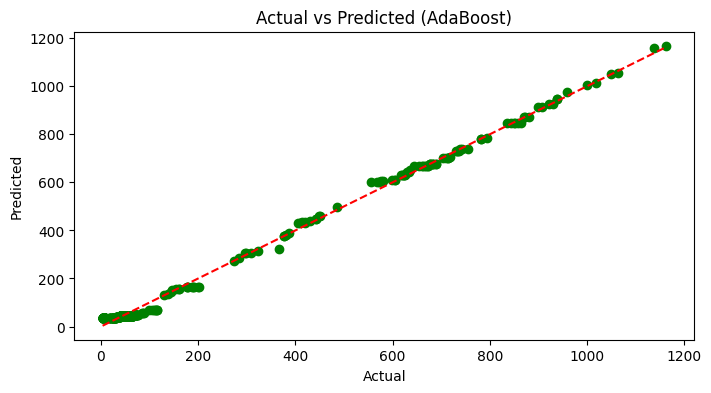

In [114]:
#plotting the graph between actualvs predicted values of AdaBoost.
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 4))
plt.scatter(y_test, adaboost_predictions, color='green')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted (AdaBoost)')
plt.show()

In [115]:
#GBoost
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Step a: Read the data with pandas and find features and target variables
data = pd.read_csv('TSLA.csv')
X = data.drop(['Date', 'Close', 'Adj Close'], axis=1)  # Features
y = data['Close']  # Target variable





In [116]:
# Step b: Train Gradient Boosting model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Gradient Boosting model
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [117]:
# Step c: Find MSE, MAE, RMSE for Gradient Boosting
# Predictions
gb_preds = gb_model.predict(X_test)

# Calculating MSE, MAE, RMSE for Gradient Boosting
gb_mse = mean_squared_error(y_test, gb_preds)
gb_mae = mean_absolute_error(y_test, gb_preds)
gb_rmse = mean_squared_error(y_test, gb_preds, squared=False)

In [118]:
print("Gradient Boosting Metrics:")
print(f"MSE: {gb_mse}")
print(f"MAE: {gb_mae}")
print(f"RMSE: {gb_rmse}")

Gradient Boosting Metrics:
MSE: 36.08616952271067
MAE: 2.280158382256797
RMSE: 6.007176501711155


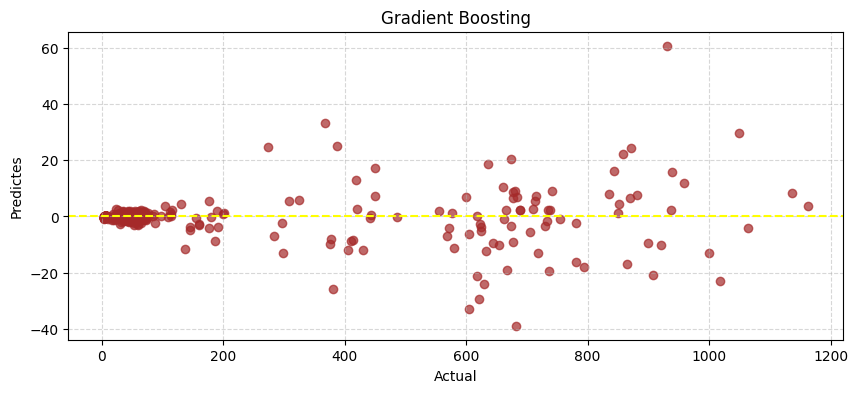

In [119]:
# Plotting the garph between  actual vs predicted values of GBoost.
gb_residuals = y_test - gb_preds


plt.figure(figsize=(10, 4))
plt.scatter(y_test, gb_residuals, color='brown', alpha=0.7)
plt.axhline(y=0, color='yellow', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Predictes')
plt.title('Gradient Boosting')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


In [120]:
# XGBoost
# Train XGBoost model
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

# Step e: Find MSE, MAE, RMSE for XGBoost
# Predictions
xgb_preds = xgb_model.predict(X_test)

# Calculating MSE, MAE, RMSE for XGBoost
xgb_mse = mean_squared_error(y_test, xgb_preds)
xgb_mae = mean_absolute_error(y_test, xgb_preds)
xgb_rmse = mean_squared_error(y_test, xgb_preds, squared=False)

print("\nXGBoost Metrics:")
print(f"MSE: {xgb_mse}")
print(f"MAE: {xgb_mae}")
print(f"RMSE: {xgb_rmse}")



XGBoost Metrics:
MSE: 78.18460756455126
MAE: 3.096727093656798
RMSE: 8.842206034952548


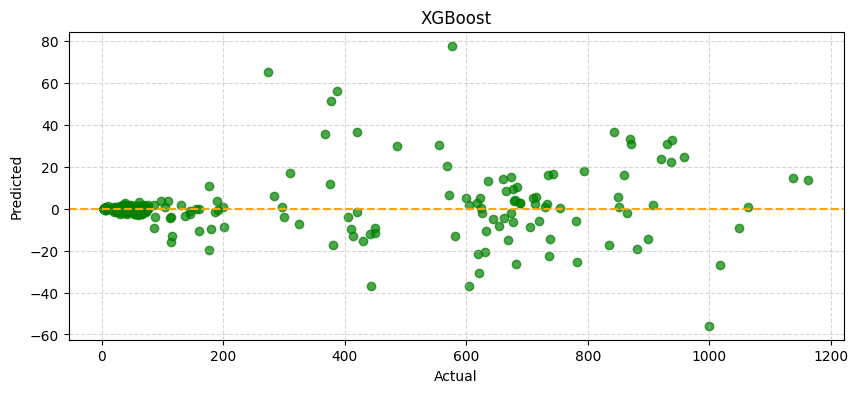

In [121]:
# Plotting the graph between actual vs predicted values of XGBoost.
xgb_residuals = y_test - xgb_preds


plt.figure(figsize=(10, 4))
plt.scatter(y_test, xgb_residuals, color='green', alpha=0.7)
plt.axhline(y=0, color='orange', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('XGBoost')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


In [73]:
#Mean squared Error's of the above machine learning algorithms.
print("Linear Regression->Mean Squared Error: 8.585048639468517e-28")
print("KNN ->Mean Squared Error: 131.65820535316934")
print("Decision Tree->Mean Squared Error: 2.440802406889585" )
print("SVM->Mean Squared Error: 14.798159688829678")
print("Random Forest->Mean Squared Error: 2.1838412547555475")
print("AdaBoost->Mean Squared Error: 408.5870473942364")
print("GBoost->Mean Squared Error: 36.08616952271067")
print("XGBoost->Mean Squared Error: 78.18460756455126 ")





Linear Regression->Mean Squared Error: 8.585048639468517e-28
KNN ->Mean Squared Error: 131.65820535316934
Decision Tree->Mean Squared Error: 2.440802406889585
SVM->Mean Squared Error: 14.798159688829678
Random Forest->Mean Squared Error: 2.1838412547555475
AdaBoost->Mean Squared Error: 408.5870473942364
GBoost->Mean Squared Error: 36.08616952271067
XGBoost->Mean Squared Error: 78.18460756455126 
